In [1]:
import os
from collections import OrderedDict
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
mshfile = 'seismic.msh'
hdffile = 'masks.hdf5'
cellsize = 5

In [3]:
with open(mshfile, 'r') as fp:
    nx, ny, nz = tuple((int(item) for item in fp.readline().strip().split()))
    ox, oy, oz = tuple((float(item) for item in fp.readline().strip().split()))
if not os.path.isfile(hdffile):
    %run make_seismodels.py
masks = h5py.File(hdffile)
dims = (nz, ny, nx)
origin = (oz, oy, ox)
ez = oz - nz * cellsize
ey = oy + ny * cellsize
ex = ox + nx * cellsize

Reading GOCAD ts file...
Reading GOCAD ts file...
Reading GOCAD ts file...
Reading GOCAD ts file...
Reading GOCAD ts file...
Reading GOCAD ts file...
Reading GOCAD ts file...
Reading GOCAD ts file...
Extracting indices from grid...
Extracting indices from grid...
Extracting indices from grid...
Extracting indices from grid...
Extracting indices from grid...
Extracting indices from grid...
Extracting indices from grid...
Extracting indices from grid...


In [4]:
backgroundDensity = 2700.
densities = OrderedDict([
    ('till',    2700.),
    ('xvk',     2700.),
    ('pk1',     2700.),
    ('pk2',     2700.),
    ('pk3',     2700.),
    ('hk',      2700.),
    ('vk',      2700.),
    ('air',     1.225),
])

backgroundVelocity = 5600.
velocities = OrderedDict([
    ('till',    2000.),
    ('xvk',     4300.),
    ('pk1',     4300.),
    ('pk2',     4300.),
    ('pk3',     4300.),
    ('hk',      4300.),
    ('vk',      4300.),
    ('air',     343.),
])

In [5]:
vel = np.ones(dims, dtype=np.float64) * backgroundVelocity
for key in velocities.keys():
    mask = np.array(masks[key])
    vel[mask] = velocities[key]

In [6]:
surf = np.array([np.argwhere(col)[0] for col in (np.array(masks['air']).reshape((nz, nx*ny))).T]).reshape((ny, nx))

(7133150.0, 7134800.0, -170.0, 480.0)

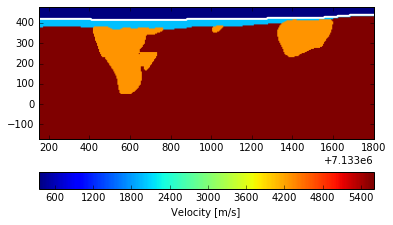

In [7]:
xplane = 100

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(vel[:,:,xplane], extent=[oy, ey, oz, ez], cmap=cm.jet)
cbax = plt.colorbar(orientation='horizontal')
cbax.set_label('Velocity [m/s]')
ax.invert_yaxis()

axis = plt.axis()
ax.plot(np.linspace(oy, ey, ny), surf[:,xplane]*cellsize + ez, 'w-', linewidth=2)
plt.axis(axis)